In [1]:
import numpy as np
import pandas as pd
import open3d as o3d
import pymeshlab as pyml
import time 
import os
import trimesh

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

import matplotlib.pyplot as plt
import seaborn as sns


from plyfile import PlyData, PlyElement


In [2]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_colwidth", 256)

In [3]:
%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})


In [4]:
os.chdir("D:\\Workspace\\Python\\Thesis Data\\")

In [5]:
INPUT_PATH = os.getcwd()+'\\Save data\\Processed_data'
OUTPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'

INPUT_TEMP_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output_temp'
OUTPUT_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output'
OUTPUT_PCA_PATH = os.getcwd()+'\\Save data\\Processed_data\\Output\\PCA'

In [6]:
patient_id_list = '2_BC	3_BC	4_BC	5_BM	6_BM	7_BP	8_BP	9_KBW	10_SUM	11_DHM	12_GAW	13_PMM	14_TR	15_TR	16_TR	18_EM	19_EM	20_EM	21_FA	22_FA	23_HJ	24_HJ	25_HM	26_HM	27_HM	28_JM	29_JM	30_JM	31_JM	32_JM	33_KBB	34_KBB	35_KBB	36_KBB	37_KBB	38_KBB	39_KBB	40_KBB	41_KBB	42_KBB	43_KBB	44_AC	45_AC	46_LE	47_LE	48_LE	49_LE	50_LE	51_LE	52_LE	53_LS	54_MR	55_MR	56_WA	57_SF	58_SI	59_SI	1_AK	60_BL	61_BN	62_CA	63_CA	64_CA	65_FU	66_GI	67_HC	68_HD	69_HI	70_HI	71_HRA	72_HRA	73_HS	74_HS	75_IS	76_JM	77_KA	78_KB	79_KBB	80_KBB	81_KBB	82_KBB	83_KBB	84_KE	85_KG	86_KI	87_KJ	88_KR	89_LE	90_BMW	91_LS	92_MAS	93_MAS	94_MAS	95_MAS	96_MAS	97_MD	98_MJ	99_MM	100_MR	101_MR	102_OC	103_PA	104_PH	105_RS	106_RU	107_SA	108_SB	109_SG	110_SK	111_SK	112_SM	113_SN	114_SR	115_SR	116_SR	117_TI	118_TI	119_TI	120_TM	121_TR	122_TR	123_TR	124_VA	125_VT	126_WD	127_WW	128_WW	129_ZK	130_ZK	131_ZK'
patient_id_list = patient_id_list.split()
patient_id_list[:5]

['2_BC', '3_BC', '4_BC', '5_BM', '6_BM']

In [7]:
patient_id_list_new =  '2_BC	3_BC	4_BC	5_BM	6_BM	7_BP	8_BP	9_KBW	10_SUM	11_DHM	12_GAW	13_PMM	14_TR	15_TR	16_TR	18_EM	19_EM	20_EM	21_FA	22_FA	23_HJ	24_HJ	25_HM	26_HM	27_HM	28_JM	29_JM	30_JM	31_JM	32_JM	33_KBB	34_KBB	35_KBB	36_KBB	37_KBB	38_KBB	39_KBB	40_KBB	41_KBB	42_KBB	43_KBB	44_AC	45_AC	46_LE	47_LE	48_LE	49_LE	50_LE	51_LE	52_LE	53_LS	54_MR	55_MR	56_WA	57_SF	58_SI	59_SI	1_AK	60_BL	61_BN	62_CA	63_CA	64_CA	65_FU	66_GI	67_HC	68_HD	69_HI	70_HI	71_HRA	72_HRA	73_HS	74_HS	75_IS	76_JM	77_KA	78_KB	79_KBB	80_KBB	81_KBB	82_KBB	83_KBB	84_KE	85_KG	86_KI	87_KJ	88_KR	89_LE	90_BMW	91_LS	92_MAS	93_MAS	94_MAS	95_MAS	96_MAS	97_MD	98_MJ	99_MM	100_MR	101_MR	102_OC	103_PA	104_PH	105_RS	106_RU	107_SA	108_SB	109_SG	110_SK	111_SK	112_SM	113_SN	114_SR	115_SR	116_SR	117_TI	118_TI	119_TI	120_TM	121_TR	122_TR	123_TR	124_VA	125_VT	126_WD	127_WW	128_WW	129_ZK	130_ZK	131_ZK'
patient_id_list_new = patient_id_list_new.split()
patient_id_list_new[:5]

['2_BC', '3_BC', '4_BC', '5_BM', '6_BM']

In [8]:
ORIGINAL_FILENAME = "_PLY0.ply"
WSS_FILENAME = "_WSS.csv"
WSS_DOWN_FILENME = "_WSS_down.csv"
CURV_FILENAME = "_curv_down.csv"

PYMESH_FILENAME = "_pymesh.ply"
DESC_1_FILENAME = "_fpfh.ply"
DESC_2_FILENAME = "_shot.ply"

RADIUS_SEARCH = 0.00024
RADIUS = RADIUS_SEARCH * 0.6

OUTPUT_FILENAME = "_output.ply"
PCA_FILENAME = "_pca.ply"
os.path.join(OUTPUT_TEMP_PATH,f"{'3_BC'}{PCA_FILENAME}")

'D:\\Workspace\\Python\\Thesis Data\\Save data\\Processed_data\\Output_temp\\3_BC_pca.ply'

In [9]:
print (f"TOTAL FILES TO BE PROCESSED: {len(patient_id_list)}")

TOTAL FILES TO BE PROCESSED: 130


In [23]:
patient_id_list_new = ['102_OC', '27_HM', '113_SN','101_MR','48_LE','4_BC',
         '91_LS', '32_JM',  '67_HC','130_ZK', '55_MR','97_MD', 
         '122_TR', '124_VA', '120_TM', '31_JM','109_SG','89_LE', 
         '75_IS', '69_HI', '78_KB','73_HS', '126_WD','80_KBB','35_KBB', '30_JM',
         '26_HM', '118_TI','105_RS','15_TR','93_MAS',
         '106_RU', '123_TR', '16_TR', '61_BN', '50_LE','68_HD',
         '110_SK','111_SK','86_KI', '108_SB', '2_BC', '3_BC', '10_SUM', 
         '42_KBB','114_SR', '115_SR','41_KBB','76_JM','13_PMM','14_TR','40_KBB',
         '54_MR', '12_GAW', '9_KBW','99_MM','92_MAS', '46_LE','37_KBB','119_TI',
         '65_FU', '22_FA',  '21_FA','57_SF','88_KR','90_BMW', '34_KBB',
         '60_BL','81_KBB','58_SI','77_KA','83_KBB', '51_LE','74_HS','1_AK', '8_BP',
          '95_MAS','79_KBB',  '38_KBB','94_MAS', '98_MJ',
          '36_KBB','39_KBB', '104_PH', '43_KBB', 
          '121_TR', '6_BM',
          '28_JM','62_CA','96_MAS', '52_LE', '100_MR', '44_AC', '63_CA',  
         '29_JM', 
         '18_EM','33_KBB','71_HRA', '11_DHM','107_SA', '45_AC', '129_ZK'
          ]
len(patient_id_list_new)

102

# Check max and minimum for each feature

# 1 Based on WSS

## 1.1 WSS for downsampled files

In [10]:
def scale_data(col: pd.Series,scaler) -> pd.Series:
    """
    Scale a column
    """
    X = col.values.reshape(-1, 1).copy()
    scaled_array = scaler.fit_transform(X)

    scaled_column = pd.Series(scaled_array.tolist()).explode()

    return scaled_column

In [11]:
def my_global_scaler(X, r_min,r_max,t_min,t_max):
    return ((X - r_min)/(r_max - r_min))*(t_max-t_min) + t_min
#https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range


r_min = -100
r_max = 100
t_min = 0
t_max = 1

# X = scaler_df.fpfh_1.apply(lambda x: my_global_scaler(x, r_min,r_max,t_min,t_max))
# np.min(X), np.max(X)

In [12]:
wss_columns = ['original_points','sampled_points','down_percent','wss_mean','wss_median','wss_std','wss_min','wss_max',]

wss_eda = pd.DataFrame(index=patient_id_list, columns = wss_columns )
wss_eda_scaled = pd.DataFrame(index=patient_id_list, columns = wss_columns )

if not wss_eda.empty and wss_eda_scaled.empty :
    del(wss_eda)
    del(wss_eda_scaled)
    

wss_eda.head(2)

,original_points,sampled_points,down_percent,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:

for PATIENT_ID in patient_id_list:

    df_wss_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df_wss= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df_wss["WSS_scaled"] = scale_data(df_wss["WSS"],min_max_scaler)
    
    
    wss_eda.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0] , 
                               np.round((df_wss.shape[0]/df_wss_org.shape[0])*100,4),
                               np.mean(df_wss.WSS), np.median(df_wss.WSS), np.std(df_wss.WSS), 
                               np.min(df_wss.WSS), np.max(df_wss.WSS)
                         ]
    wss_eda_scaled.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0],
                                    np.round((df_wss.shape[0]/df_wss_org.shape[0])*100,4),
                                      np.mean(df_wss.WSS_scaled), np.median(df_wss.WSS_scaled), np.std(df_wss.WSS_scaled), 
                                      np.min(df_wss.WSS_scaled), np.max(df_wss.WSS_scaled)
                         ]
wss_eda = wss_eda.infer_objects()
wss_eda_scaled = wss_eda_scaled.infer_objects()

wss_eda.head(2)

,original_points,sampled_points,down_percent,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127,15307,19.8465,2.442902,2.060087,2.077016,0.000200,15.853008
3_BC,28274,15271,54.0108,7.466673,7.264673,4.002541,0.230612,24.304548


In [14]:
wss_eda

,original_points,sampled_points,down_percent,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127,15307,19.8465,2.442902,2.060087,2.077016,2.004000e-04,15.853008
3_BC,28274,15271,54.0108,7.466673,7.264673,4.002541,2.306118e-01,24.304548
4_BC,22604,15223,67.3465,7.260832,7.498598,2.852982,3.951359e-01,23.425859
5_BM,95358,15366,16.1140,10.949294,7.803671,10.504066,3.124227e-02,71.630961
6_BM,20744,15154,73.0524,6.414408,4.197773,5.856207,1.292646e-02,33.893198
7_BP,68120,15286,22.4398,26.196814,25.624830,20.375823,4.146856e-01,94.081440
8_BP,88042,15376,17.4644,19.293888,17.097919,15.138184,3.450818e-01,128.226120
9_KBW,79622,15393,19.3326,4.795580,4.109427,2.893071,1.975087e-01,16.852714
10_SUM,70856,15155,21.3884,6.584739,5.266132,5.640054,5.212654e-02,32.241898
11_DHM,76754,15304,19.9390,4.662614,3.344228,4.341918,1.478156e-02,39.479175


In [15]:
wss_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,down_percent,wss_mean,wss_median,wss_std,wss_min,wss_max
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000
mean,66639.869231,15306.069231,26.184475,15.344178,12.412472,12.869709,2.933446e-01,84.066818
std,22043.015602,94.365871,11.410649,16.475825,12.915737,15.828305,4.140503e-01,90.754155
min,20744.000000,15112.000000,10.251200,2.442902,0.932567,1.869032,3.800000e-07,12.904393
50%,65068.500000,15301.000000,23.463600,11.345717,9.021222,9.832742,1.567641e-01,62.440954
55.6%,70595.000000,15311.666667,24.486200,13.323724,10.346892,10.440764,1.890138e-01,70.770471
61.1%,74080.000000,15321.833333,25.434517,14.335477,12.069789,11.082416,2.061462e-01,76.077543
66.7%,76040.000000,15330.000000,26.770400,16.192440,12.637165,12.129611,2.559105e-01,82.457105
72.2%,77868.333333,15344.166667,28.018017,16.695126,13.480407,12.807824,3.125382e-01,92.323213
77.8%,80976.000000,15359.333333,30.629467,17.683047,15.054074,16.027241,3.978479e-01,102.674747


In [36]:
wss_eda.iloc[:,3:].describe(percentiles = [0,0.05,0.25,0.5,0.75,0.85,0.9,0.95,1])

,wss_mean,wss_median,wss_std,wss_min,wss_max
count,130.000000,130.000000,130.000000,1.300000e+02,130.000000
mean,15.344178,12.412472,12.869709,2.933446e-01,84.066818
std,16.475825,12.915737,15.828305,4.140503e-01,90.754155
min,2.442902,0.932567,1.869032,3.800000e-07,12.904393
0%,2.442902,0.932567,1.869032,3.800000e-07,12.904393
5%,3.180286,2.037936,2.871022,2.545144e-03,17.819318
25%,7.408379,5.923989,5.866453,6.491935e-02,38.731333
50%,11.345717,9.021222,9.832742,1.567641e-01,62.440954
75%,17.180704,14.053114,15.230672,3.445948e-01,97.394627
85%,21.818599,17.617645,19.647347,4.698935e-01,124.950246


c:\users\abhil\anaconda3\envs\kpconv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\abhil\anaconda3\envs\kpconv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

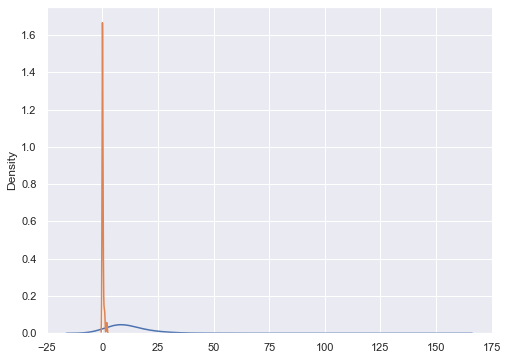

In [35]:
sns.distplot(wss_eda[["wss_std"]], hist= False, kde=True )
sns.distplot(wss_eda[["wss_min"]], hist= False, kde=True )

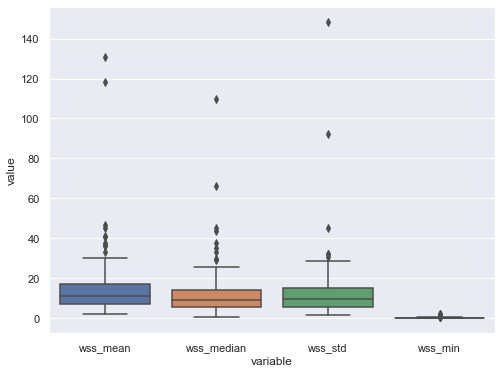

In [23]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.iloc[:,3:-1]))

plt.show()

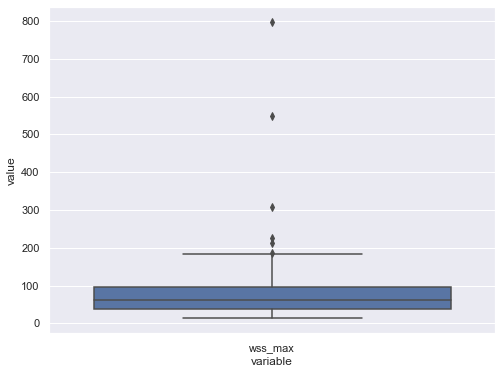

In [22]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda.iloc[:,7:]))

plt.show()

In [24]:
wss_eda.query("wss_max >= 183").index.values

array(['25_HM', '49_LE', '53_LS', '56_WA', '66_GI', '72_HRA', '82_KBB',
       '112_SM'], dtype=object)

In [22]:
wss_eda.query("wss_std >= 28").index.values

array(['15_TR', '28_JM', '49_LE', '51_LE', '53_LS', '72_HRA', '112_SM',
       '122_TR'], dtype=object)

In [29]:
OUTLIER_WSS_PIDs = ['25_HM', '49_LE', '53_LS', '56_WA', '66_GI', '72_HRA', '82_KBB',
       '112_SM']

In [83]:
r_min = 1.2
r_max = 30
t_min = 0
t_max = 1

X = wss_eda.query("wss_std<@r_max").wss_std.apply(lambda x: my_global_scaler(x, r_min,r_max,t_min,t_max))
np.min(X), np.max(X)

(0.023230271248751187, 0.9628742026331883)

### Removing Outliers 

In [85]:
patient_id_list_new = [x for x in patient_id_list if x not in OUTLIER_WSS_PIDs]
len(patient_id_list_new)

122

In [24]:
wss_columns = ['original_points','sampled_points','down_percent','wss_mean','wss_median','wss_std','wss_min','wss_max',]

if not wss_eda.empty and wss_eda_scaled.empty :
    del(wss_eda_new)
    del(wss_eda_scaled)
    

wss_eda_new = pd.DataFrame(index=patient_id_list, columns = wss_columns )
# wss_eda_scaled = pd.DataFrame(index=patient_id_list, columns = wss_columns )

wss_eda_new.head(2)

,original_points,sampled_points,down_percent,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:

for PATIENT_ID in patient_id_list_new:

    df_wss_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df_wss= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df_wss["WSS_scaled"] = scale_data(df_wss["WSS"],min_max_scaler)
    
    
    wss_eda_new.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0] , 
                               np.round((df_wss.shape[0]/df_wss_org.shape[0])*100,4),
                               np.mean(df_wss.WSS), np.median(df_wss.WSS), np.std(df_wss.WSS), 
                               np.min(df_wss.WSS), np.max(df_wss.WSS)
                         ]
#     wss_eda_scaled.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0],
#                                     np.round((df_wss.shape[0]/df_wss_org.shape[0])*100,4),
#                                       np.mean(df_wss.WSS_scaled), np.median(df_wss.WSS_scaled), np.std(df_wss.WSS_scaled), 
#                                       np.min(df_wss.WSS_scaled), np.max(df_wss.WSS_scaled)
#                          ]
wss_eda_new = wss_eda_new.infer_objects()
# wss_eda_scaled = wss_eda_scaled.infer_objects()

wss_eda_new.head(2)

,original_points,sampled_points,down_percent,wss_mean,wss_median,wss_std,wss_min,wss_max
2_BC,77127.0,15307.0,19.8465,2.442902,2.060087,2.077016,0.000200,15.853008
3_BC,28274.0,15271.0,54.0108,7.466673,7.264673,4.002541,0.230612,24.304548


In [26]:
wss_eda_new.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,down_percent,wss_mean,wss_median,wss_std,wss_min,wss_max
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000
mean,65755.813725,15310.362745,26.085284,12.479947,10.382286,10.280817,2.359121e-01,70.070904
std,19106.456317,94.350494,11.022668,7.925782,7.367202,6.790400,2.682741e-01,41.567766
min,20744.000000,15112.000000,13.034500,2.442902,0.932567,1.869032,3.800000e-07,12.904393
50%,65283.500000,15309.000000,23.275400,9.997547,8.503290,8.984135,1.567641e-01,61.083059
55.6%,70805.333333,15320.111111,23.780511,11.954478,9.510609,10.037067,1.795980e-01,67.590655
61.1%,74033.777778,15325.166667,24.955550,13.558143,10.842897,10.304066,2.002323e-01,75.379217
66.7%,75528.666667,15332.666667,26.173067,14.344023,12.076882,11.197272,2.245346e-01,78.064460
72.2%,76960.944444,15344.833333,27.554667,15.978749,12.727109,11.862033,2.822823e-01,89.865311
77.8%,78657.555556,15359.555556,29.538211,16.306400,13.540325,12.428243,3.162766e-01,98.917584


In [90]:
r_min = 1.2
r_max = 33
t_min = 0
t_max = 1

X = wss_eda_new.query("wss_std<@r_max").wss_std.apply(lambda x: my_global_scaler(x, r_min,r_max,t_min,t_max))
np.min(X), np.max(X)

(0.021038736225284092, 0.9807924158986806)

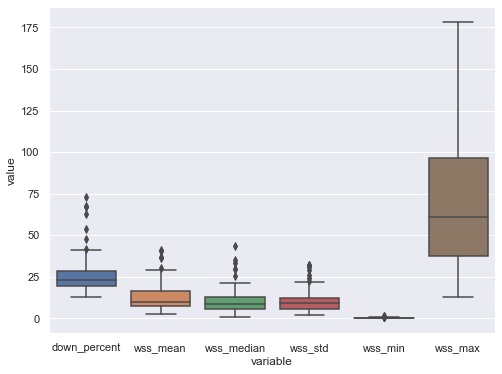

In [27]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_eda_new.iloc[:,2:]))

plt.show()

## 1.2 WSS percentage distribution

In [31]:
wss_columns = ['original_points','sampled_points','min','20p','50p','70p','80p','90p','max']



wss_distribution = pd.DataFrame(index=patient_id_list, columns = wss_columns )
wss_distribution_scaled = pd.DataFrame(index=patient_id_list, columns = wss_columns )

if not wss_distribution.empty and wss_eda_scaled.empty :
    del(wss_distribution)
    del(wss_distribution_scaled)
    

wss_distribution.head(2)

,original_points,sampled_points,min,20p,50p,70p,80p,90p,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def my_global_scaler(X, r_min,r_max):
    t_min = 0
    t_max = 1
    return ((X - r_min)/(r_max - r_min))*(t_max-t_min) + t_min
#https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range

In [33]:

for PATIENT_ID in patient_id_list_new:

    df_wss_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df_wss= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
#     #Scale the data
#     min_max_scaler = MinMaxScaler() 
#     df_wss["WSS_scaled"] = scale_data(df_wss["WSS"],min_max_scaler)
    
    col = "WSS" 
    
    r_min = 0
    r_max = 183
    
    df = df_wss.copy()
    df.loc[df[col] < r_min] = r_min
    df.loc[df[col] > r_max] = r_max
    df[col] = df[col].apply(
        lambda x: my_global_scaler(x, r_min, r_max)
    )
    
    desc = df_wss.describe(percentiles = [0.2, 0.5, 0.7, 0.8, 0.9])['WSS'] 
    desc_scaled = df.describe(percentiles = [0.2, 0.5, 0.7, 0.8, 0.9])['WSS'] 

    
    wss_distribution.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0] , 
                                   desc["min"],  desc["20%"],desc["50%"],desc["70%"],desc["80%"],
                                   desc["90%"], desc["max"], 
                                  ]
    
    wss_distribution_scaled.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0] , 
                                   desc_scaled["min"],  desc_scaled["20%"],desc_scaled["50%"],desc_scaled["70%"]
                                               ,desc_scaled["80%"],
                                   desc_scaled["90%"], desc_scaled["max"], 
                                  ]

wss_distribution = wss_distribution.infer_objects()
wss_distribution_scaled = wss_distribution_scaled.infer_objects()

wss_distribution.head(2)

,original_points,sampled_points,min,20p,50p,70p,80p,90p,max
2_BC,77127.0,15307.0,0.000200,0.485114,2.060087,3.131026,4.064144,5.316274,15.853008
3_BC,28274.0,15271.0,0.230612,3.708818,7.264673,9.444738,10.830660,12.661778,24.304548


In [34]:
wss_distribution.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,min,20p,50p,70p,80p,90p,max
count,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,65755.813725,15310.362745,2.359121e-01,3.596484,10.382286,15.972724,19.648277,25.609267,70.070904
std,19106.456317,94.350494,2.682741e-01,2.665925,7.367202,11.070769,13.206328,16.672226,41.567766
min,20744.000000,15112.000000,3.800000e-07,0.000210,0.932567,3.131026,4.064144,5.316274,12.904393
50%,65283.500000,15309.000000,1.567641e-01,2.926198,8.503290,13.095828,15.926915,21.426592,61.083059
55.6%,70805.333333,15320.111111,1.795980e-01,3.297641,9.510609,14.953516,19.134600,24.212931,67.590655
61.1%,74033.777778,15325.166667,2.002323e-01,3.886947,10.842897,16.477279,20.867310,26.818918,75.379217
66.7%,75528.666667,15332.666667,2.245346e-01,4.254895,12.076882,18.367319,21.889692,29.260087,78.064460
72.2%,76960.944444,15344.833333,2.822823e-01,4.891353,12.727109,19.290871,23.890854,29.824951,89.865311
77.8%,78657.555556,15359.555556,3.162766e-01,5.697360,13.540325,20.723685,24.876338,32.509691,98.917584


In [35]:
#95% of the files have 90% of points with WSS <0.46
wss_distribution_scaled.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,min,20p,50p,70p,80p,90p,max
count,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,65755.813725,15310.362745,1.289137e-03,0.019653,0.056734,0.087283,0.107368,0.139941,0.382901
std,19106.456317,94.350494,1.465979e-03,0.014568,0.040258,0.060496,0.072166,0.091105,0.227146
min,20744.000000,15112.000000,2.076503e-09,0.000001,0.005096,0.017109,0.022208,0.029051,0.070516
50%,65283.500000,15309.000000,8.566344e-04,0.015990,0.046466,0.071562,0.087032,0.117085,0.333787
55.6%,70805.333333,15320.111111,9.814099e-04,0.018020,0.051971,0.081713,0.104561,0.132311,0.369348
61.1%,74033.777778,15325.166667,1.094166e-03,0.021240,0.059251,0.090040,0.114029,0.146551,0.411908
66.7%,75528.666667,15332.666667,1.226965e-03,0.023251,0.065994,0.100368,0.119616,0.159891,0.426582
72.2%,76960.944444,15344.833333,1.542526e-03,0.026729,0.069547,0.105415,0.130551,0.162978,0.491067
77.8%,78657.555556,15359.555556,1.728287e-03,0.031133,0.073991,0.113244,0.135936,0.177649,0.540533


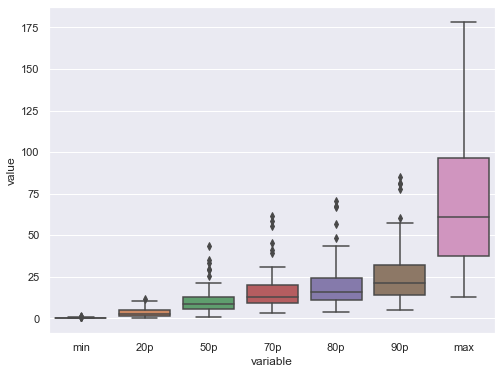

In [36]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_distribution.iloc[:,2:]))

plt.show()

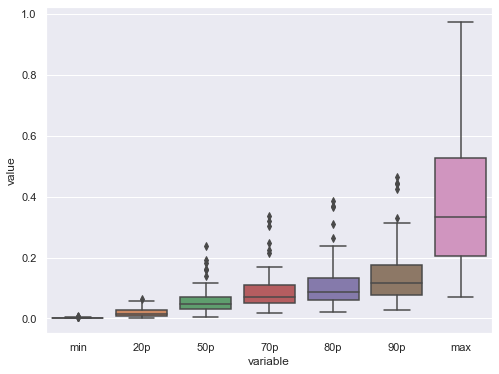

In [37]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_distribution_scaled.iloc[:,2:]))

plt.show()

### Local Scaling

In [39]:
def scale_data(col: pd.Series,scaler) -> pd.Series:
    """
    Scale a column
    """
    X = col.values.reshape(-1, 1).copy()
    scaled_array = scaler.fit_transform(X)

    scaled_column = pd.Series(scaled_array.tolist()).explode()

    return scaled_column

In [40]:
wss_columns = ['original_points','sampled_points','min','20p','50p','70p','80p','90p','max']



wss_distribution = pd.DataFrame(index=patient_id_list, columns = wss_columns )
wss_distribution_scaled = pd.DataFrame(index=patient_id_list, columns = wss_columns )

if not wss_distribution.empty and wss_eda_scaled.empty :
    del(wss_distribution)
    del(wss_distribution_scaled)
    

wss_distribution.head(2)

,original_points,sampled_points,min,20p,50p,70p,80p,90p,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:

for PATIENT_ID in patient_id_list_new:

    df_wss_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df_wss= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{WSS_DOWN_FILENME}"))
    
#     #Scale the data
    df = df_wss.copy()
    min_max_scaler = MinMaxScaler() 
    df["WSS"] = scale_data(df["WSS"],min_max_scaler)
    df = df.infer_objects()
#     col = "WSS" 
    
#     r_min = 0
#     r_max = 183
    
#     df = df_wss.copy()
#     df.loc[df[col] < r_min] = r_min
#     df.loc[df[col] > r_max] = r_max
#     df[col] = df[col].apply(
#         lambda x: my_global_scaler(x, r_min, r_max)
#     )
    
    desc = df_wss.describe(percentiles = [0.2, 0.5, 0.7, 0.8, 0.9])['WSS'] 
    desc_scaled = df.describe(percentiles = [0.2, 0.5, 0.7, 0.8, 0.9])['WSS'] 

    
    wss_distribution.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0] , 
                                   desc["min"],  desc["20%"],desc["50%"],desc["70%"],desc["80%"],
                                   desc["90%"], desc["max"], 
                                  ]
    
    wss_distribution_scaled.loc[PATIENT_ID] = [df_wss_org.shape[0], df_wss.shape[0] , 
                                   desc_scaled["min"],  desc_scaled["20%"],desc_scaled["50%"],desc_scaled["70%"]
                                               ,desc_scaled["80%"],
                                   desc_scaled["90%"], desc_scaled["max"], 
                                  ]

wss_distribution = wss_distribution.infer_objects()
wss_distribution_scaled = wss_distribution_scaled.infer_objects()

wss_distribution.head(2)

,original_points,sampled_points,min,20p,50p,70p,80p,90p,max
2_BC,77127.0,15307.0,0.000200,0.485114,2.060087,3.131026,4.064144,5.316274,15.853008
3_BC,28274.0,15271.0,0.230612,3.708818,7.264673,9.444738,10.830660,12.661778,24.304548


In [53]:
#95% of the files have 90% of points with WSS <0.46
wss_distribution_scaled.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,min,20p,50p,70p,80p,90p,max
count,102.000000,102.000000,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,65755.813725,15310.362745,0.0,0.055587,0.154446,0.235707,0.290172,0.375008,1.000000e+00
std,19106.456317,94.350494,0.0,0.043871,0.066214,0.073081,0.079227,0.087380,1.000360e-16
min,20744.000000,15112.000000,0.0,0.000002,0.020449,0.046345,0.061165,0.164176,1.000000e+00
50%,65283.500000,15309.000000,0.0,0.046677,0.144712,0.227606,0.289063,0.382122,1.000000e+00
55.6%,70805.333333,15320.111111,0.0,0.051896,0.155671,0.236238,0.297465,0.395649,1.000000e+00
61.1%,74033.777778,15325.166667,0.0,0.059603,0.161975,0.247754,0.309886,0.404589,1.000000e+00
66.7%,75528.666667,15332.666667,0.0,0.064598,0.170659,0.266753,0.322811,0.418275,1.000000e+00
72.2%,76960.944444,15344.833333,0.0,0.070610,0.186556,0.277704,0.337138,0.428846,1.000000e+00
77.8%,78657.555556,15359.555556,0.0,0.075843,0.191875,0.288623,0.346240,0.440487,1.000000e+00


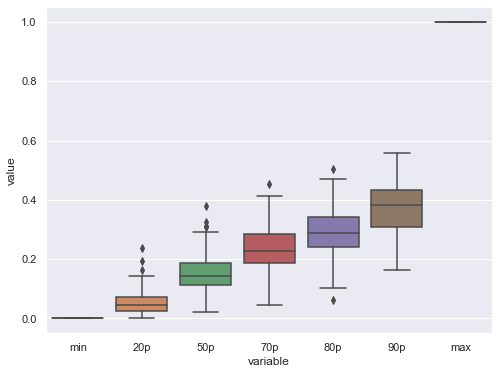

In [52]:
sns.boxplot(x="variable", y="value", data=pd.melt(wss_distribution_scaled.iloc[:,2:]))

plt.show()

# 2. Based on Mean Curvature

In [56]:
curv_columns = ['original_points','sampled_points','mean','median','std','min','max',]

curv_eda = pd.DataFrame(index=patient_id_list, columns = curv_columns )
curv_eda_scaled_global = pd.DataFrame(index=patient_id_list, columns = curv_columns )
curv_eda_scaled_local = pd.DataFrame(index=patient_id_list, columns = curv_columns )


if not curv_eda.empty and curv_eda_scaled.empty :
    del(curv_eda)
    del(curv_eda_scaled)
    

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
for PATIENT_ID in patient_id_list:

    df_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df_curv= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler()
    df = df_curv.copy()
    
    df["curv_scaled"] = scale_data(df["mean_curv"],min_max_scaler)
    df = df.infer_objects()
   
    curv_eda.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.mean_curv), np.median(df.mean_curv), np.std(df.mean_curv), 
                               np.min(df.mean_curv), np.max(df.mean_curv)
                         ]
    curv_eda_scaled_local.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
                                      np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
                                      np.min(df.curv_scaled), np.max(df.curv_scaled)]
    col = "mean_curv" 
    
    r_min = -0.001
    r_max = 0.0008

    df = df_curv.copy()
    
    df.loc[df[col] < r_min] = r_min
    df.loc[df[col] > r_max] = r_max
    df["curv_scaled"] = df[col].apply(
        lambda x: my_global_scaler(x, r_min, r_max)
    )
    df = df.infer_objects()
    curv_eda_scaled_global.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
                                      np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
                                      np.min(df.curv_scaled), np.max(df.curv_scaled)]
    
                         
curv_eda = curv_eda.infer_objects()
curv_eda_scaled_local = curv_eda_scaled_local.infer_objects()
curv_eda_scaled_global = curv_eda_scaled_global.infer_objects()

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
curv_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,66639.869231,15306.069231,0.000072,0.000076,0.000077,-0.000378,0.000387
std,22043.015602,94.365871,0.000019,0.000018,0.000013,0.000115,0.000100
min,20744.000000,15112.000000,0.000035,0.000042,0.000049,-0.001004,0.000220
50%,65068.500000,15301.000000,0.000071,0.000076,0.000076,-0.000360,0.000380
55.6%,70595.000000,15311.666667,0.000073,0.000078,0.000077,-0.000346,0.000386
61.1%,74080.000000,15321.833333,0.000077,0.000081,0.000078,-0.000335,0.000398
66.7%,76040.000000,15330.000000,0.000080,0.000084,0.000079,-0.000317,0.000417
72.2%,77868.333333,15344.166667,0.000084,0.000087,0.000082,-0.000310,0.000426
77.8%,80976.000000,15359.333333,0.000088,0.000090,0.000085,-0.000298,0.000438


### Remove outliers

In [32]:
patient_id_list_new = [x for x in patient_id_list if x not in OUTLIER_WSS_PIDs]
len(patient_id_list_new)

122

In [65]:
curv_columns = ['original_points','sampled_points','mean','median','std','min','max',]

curv_eda = pd.DataFrame(index=patient_id_list, columns = curv_columns )
curv_eda_scaled_global = pd.DataFrame(index=patient_id_list, columns = curv_columns )
curv_eda_scaled_local = pd.DataFrame(index=patient_id_list, columns = curv_columns )


if not curv_eda.empty and curv_eda_scaled.empty :
    del(curv_eda)
    del(curv_eda_scaled)
    

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
for PATIENT_ID in patient_id_list_new:

    df_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df_curv= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler()
    df = df_curv.copy()
    
    df["curv_scaled"] = scale_data(df["mean_curv"],min_max_scaler)
    df = df.infer_objects()
   
    curv_eda.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.mean_curv), np.median(df.mean_curv), np.std(df.mean_curv), 
                               np.min(df.mean_curv), np.max(df.mean_curv)
                         ]
    curv_eda_scaled_local.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
                                      np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
                                      np.min(df.curv_scaled), np.max(df.curv_scaled)]
    col = "mean_curv" 
    
    r_min = -0.001
    r_max = 0.0008

    df = df_curv.copy()
    
    df.loc[df[col] < r_min] = r_min
    df.loc[df[col] > r_max] = r_max
    df["curv_scaled"] = df[col].apply(
        lambda x: my_global_scaler(x, r_min, r_max)
    )
    df = df.infer_objects()
    curv_eda_scaled_global.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
                                      np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
                                      np.min(df.curv_scaled), np.max(df.curv_scaled)]
    
                         
curv_eda = curv_eda.infer_objects()
curv_eda_scaled_local = curv_eda_scaled_local.infer_objects()
curv_eda_scaled_global = curv_eda_scaled_global.infer_objects()

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
curv_eda_scaled_global.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,65755.813725,15310.362745,0.595597,0.597746,0.043035,0.344008,0.770157
std,19106.456317,94.350494,0.010487,0.009906,0.007198,0.063398,0.051103
min,20744.000000,15112.000000,0.575027,0.579067,0.027465,0.000000,0.677917
50%,65283.500000,15309.000000,0.594748,0.597065,0.042143,0.354500,0.766700
55.6%,70805.333333,15320.111111,0.595709,0.597792,0.043442,0.362494,0.772946
61.1%,74033.777778,15325.166667,0.597402,0.599185,0.043793,0.367519,0.778866
66.7%,75528.666667,15332.666667,0.599095,0.601667,0.044544,0.373741,0.787409
72.2%,76960.944444,15344.833333,0.601270,0.603537,0.045557,0.379794,0.791823
77.8%,78657.555556,15359.555556,0.604164,0.605118,0.047363,0.389617,0.794358


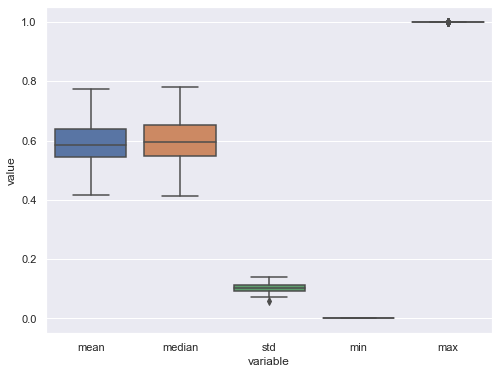

In [69]:
sns.boxplot(x="variable", y="value", data=pd.melt(curv_eda_scaled_local.iloc[:,2:]))

plt.show()

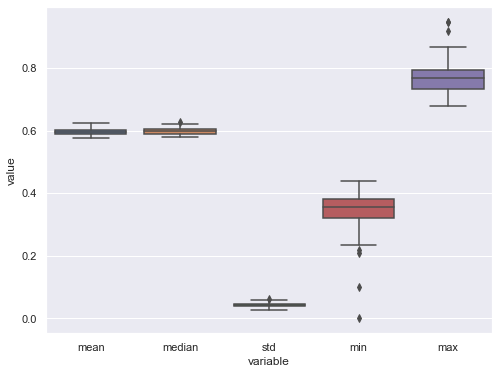

In [70]:
sns.boxplot(x="variable", y="value", data=pd.melt(curv_eda_scaled_global.iloc[:,2:]))

plt.show()

# 3. Based on Gauss Curvature

In [52]:
curv_columns = ['original_points','sampled_points','mean','median','std','min','max',]

curv_eda = pd.DataFrame(index=patient_id_list, columns = curv_columns )
curv_eda_scaled = pd.DataFrame(index=patient_id_list, columns = curv_columns )

if not curv_eda.empty and curv_eda_scaled.empty :
    del(curv_eda)
    del(curv_eda_scaled)
    

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
for PATIENT_ID in patient_id_list:

    df_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df["curv_scaled"] = scale_data(df["gauss_curv"],min_max_scaler)
    
    
    curv_eda.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.gauss_curv), np.median(df.gauss_curv), np.std(df.gauss_curv), 
                               np.min(df.gauss_curv), np.max(df.gauss_curv)
                         ]
#     curv_eda_scaled.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
#                                       np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
#                                       np.min(df.curv_scaled), np.max(df.curv_scaled)
#                          ]
curv_eda = curv_eda.infer_objects()
# curv_eda_scaled = curv_eda_scaled.infer_objects()

curv_eda_scaled.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
curv_eda.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,66639.869231,15306.069231,2.359820,0.004312,9.109985,-1.580681,57.235893
std,22043.015602,94.365871,1.136442,0.003947,3.109140,1.281055,20.086698
min,20744.000000,15112.000000,0.377723,-0.005457,2.463617,-11.024664,23.168873
50%,65068.500000,15301.000000,2.187638,0.004260,8.712009,-1.255058,50.944465
55.6%,70595.000000,15311.666667,2.317333,0.004758,8.968628,-1.187115,53.495997
61.1%,74080.000000,15321.833333,2.410923,0.005518,9.249628,-1.087491,55.165874
66.7%,76040.000000,15330.000000,2.541222,0.006197,9.586943,-1.009502,58.391861
72.2%,77868.333333,15344.166667,2.722483,0.006612,10.472564,-0.931722,60.413396
77.8%,80976.000000,15359.333333,3.036163,0.007069,11.027529,-0.852388,65.772554


### Remove outliers

In [32]:
patient_id_list_new = [x for x in patient_id_list if x not in OUTLIER_WSS_PIDs]
len(patient_id_list_new)

122

In [55]:
curv_columns = ['original_points','sampled_points','mean','median','std','min','max',]

if not curv_eda.empty and curv_eda_scaled.empty :
    del(curv_eda_new)
    del(curv_eda_scaled)
    
curv_eda_new = pd.DataFrame(index=patient_id_list, columns = curv_columns )
curv_eda_scaled = pd.DataFrame(index=patient_id_list, columns = curv_columns )



curv_eda_new.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
for PATIENT_ID in patient_id_list_new:

    df_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
    df= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df["curv_scaled"] = scale_data(df["gauss_curv"],min_max_scaler)
    
    
    curv_eda_new.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.gauss_curv), np.median(df.gauss_curv), np.std(df.gauss_curv), 
                               np.min(df.gauss_curv), np.max(df.gauss_curv)
                         ]
#     curv_eda_scaled.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
#                                       np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
#                                       np.min(df.curv_scaled), np.max(df.curv_scaled)
#                          ]
curv_eda_new = curv_eda_new.infer_objects()
# curv_eda_scaled = curv_eda_scaled.infer_objects()

curv_eda_new.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,77127.0,15307.0,2.024054,0.002289,9.486620,-2.328025,99.975026
3_BC,28274.0,15271.0,1.203820,-0.003152,5.192032,-1.253464,59.380298


In [58]:
curv_eda_new

,original_points,sampled_points,mean,median,std,min,max
2_BC,77127.0,15307.0,2.024054,0.002289,9.486620,-2.328025,99.975026
3_BC,28274.0,15271.0,1.203820,-0.003152,5.192032,-1.253464,59.380298
4_BC,22604.0,15223.0,0.898059,-0.002139,4.104142,-0.769658,38.610101
5_BM,95358.0,15366.0,1.505675,0.002420,6.044120,-3.460114,48.388458
6_BM,20744.0,15154.0,0.802247,-0.002679,4.197005,-1.276443,32.038725
7_BP,68120.0,15286.0,2.760544,0.008558,11.004523,-1.241419,66.123756
8_BP,88042.0,15376.0,3.290402,0.011157,11.722589,-0.934542,60.679434
9_KBW,79622.0,15393.0,2.563648,-0.000280,9.239819,-1.058496,48.107677
10_SUM,70856.0,15155.0,1.067421,0.003024,6.066105,-0.619127,47.638853
11_DHM,76754.0,15304.0,2.003975,0.003424,8.244838,-1.507677,47.939730


In [57]:
curv_eda_new.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,65714.147541,15304.819672,2.297255,0.004293,8.917843,-1.558929,56.771390
std,21058.851015,93.407223,1.063939,0.003827,2.904427,1.279998,20.208954
min,20744.000000,15112.000000,0.377723,-0.005457,2.463617,-11.024664,23.168873
50%,64856.000000,15303.000000,2.160050,0.004400,8.681051,-1.255058,50.819817
55.6%,68579.333333,15317.222222,2.290225,0.004786,8.961763,-1.190006,52.869546
61.1%,73813.555556,15322.944444,2.408430,0.005524,9.235773,-1.107530,54.889235
66.7%,75660.333333,15331.333333,2.526963,0.006195,9.448190,-1.016433,57.377981
72.2%,77374.333333,15346.166667,2.685984,0.006630,10.207858,-0.951802,60.257549
77.8%,79454.000000,15360.000000,2.843110,0.006984,10.753879,-0.888715,63.844624


# 3. Based on FPFH Value

In [67]:
feat_columns = ['original_points','sampled_points','mean','median','std','min','max',]

feat_new_1 = pd.DataFrame(index=patient_id_list, columns = feat_columns )
feat_new_2= pd.DataFrame(index=patient_id_list, columns = feat_columns )

if not feat_new_1.empty and feat_new_2.empty :
    del(feat_new_1)
    del(feat_new_2)
    

feat_new_1.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
for PATIENT_ID in patient_id_list_new:

    df_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
#     df= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    meshply = PlyData.read(os.path.join(OUTPUT_PCA_PATH,f"{PATIENT_ID}{PCA_FILENAME}"))
    df = pd.DataFrame()
    df['x'] = pd.Series(meshply.elements[0].data['x'])
    df['y'] = pd.Series(meshply.elements[0].data['y'])
    df['z'] = pd.Series(meshply.elements[0].data['z'])
    df[['fpfh_1','fpfh_2']] = pd.DataFrame(meshply.elements[0].data['fpfh'].tolist())
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df["fpfh_1_scaled"] = scale_data(df["fpfh_1"],min_max_scaler)
    df["fpfh_2_scaled"] = scale_data(df["fpfh_2"],min_max_scaler)

    
    
    feat_new_1.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.fpfh_1), np.median(df.fpfh_1), np.std(df.fpfh_1), 
                               np.min(df.fpfh_1), np.max(df.fpfh_1)
                                 ]
    
    feat_new_2.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.fpfh_2), np.median(df.fpfh_2), np.std(df.fpfh_2), 
                               np.min(df.fpfh_2), np.max(df.fpfh_2)
                                 ]
                                  
#     curv_eda_scaled.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
#                                       np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
#                                       np.min(df.curv_scaled), np.max(df.curv_scaled)
#                          ]
feat_new_1 = feat_new_1.infer_objects()
feat_new_2 = feat_new_2.infer_objects()

# curv_eda_scaled = curv_eda_scaled.infer_objects()

feat_new_1.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,77127.0,15307.0,-0.000064,-5.523643,50.370146,-90.354889,92.778336
3_BC,28274.0,15271.0,0.000161,8.306717,58.804830,-95.046700,97.035400


In [71]:
feat_new_1.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,65714.147541,15304.819672,0.000011,-10.449057,38.339882,-56.567001,128.101135
std,21058.851015,93.407223,0.000061,9.189026,18.022518,20.565086,32.479957
min,20744.000000,15112.000000,-0.000250,-40.282898,13.153319,-112.572601,43.782841
50%,64856.000000,15303.000000,0.000003,-8.968787,35.215206,-49.373928,136.230133
55.6%,68579.333333,15317.222222,0.000010,-7.784593,40.335660,-46.830229,142.263704
61.1%,73813.555556,15322.944444,0.000017,-6.334020,47.521981,-44.992377,146.224778
66.7%,75660.333333,15331.333333,0.000021,-4.658152,50.272910,-42.975625,148.704107
72.2%,77374.333333,15346.166667,0.000032,-3.176203,52.790361,-41.699905,151.320408
77.8%,79454.000000,15360.000000,0.000042,-1.891685,54.722061,-39.538207,152.773397


In [72]:
feat_new_2.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,65714.147541,15304.819672,0.000002,-1.326468,13.993513,-36.948092,66.532114
std,21058.851015,93.407223,0.000039,1.297994,3.553925,11.804682,20.835265
min,20744.000000,15112.000000,-0.000132,-5.798181,6.616015,-85.795898,32.694424
50%,64856.000000,15303.000000,0.000001,-1.421734,13.570117,-34.099163,61.803616
55.6%,68579.333333,15317.222222,0.000005,-1.221815,13.836470,-33.838733,63.600317
61.1%,73813.555556,15322.944444,0.000009,-1.025746,14.186119,-33.169619,65.279613
66.7%,75660.333333,15331.333333,0.000012,-0.755318,14.665995,-31.772607,67.403264
72.2%,77374.333333,15346.166667,0.000019,-0.658840,14.990358,-30.607663,69.286346
77.8%,79454.000000,15360.000000,0.000021,-0.414187,15.806695,-29.582885,72.982251


# 4. Based on SHOT Value

In [74]:
feat_columns = ['original_points','sampled_points','mean','median','std','min','max',]

feat_new_1 = pd.DataFrame(index=patient_id_list, columns = feat_columns )
feat_new_2= pd.DataFrame(index=patient_id_list, columns = feat_columns )
feat_new_3= pd.DataFrame(index=patient_id_list, columns = feat_columns )

if not feat_new_1.empty and feat_new_2.empty :
    del(feat_new_1)
    del(feat_new_2)
    del(feat_new_3)

    

feat_new_1.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
for PATIENT_ID in patient_id_list_new:

    df_org= pd.read_csv(os.path.join(INPUT_PATH,f"{PATIENT_ID}{WSS_FILENAME}"))
#     df= pd.read_csv(os.path.join(INPUT_TEMP_PATH,f"{PATIENT_ID}{CURV_FILENAME}"))
    
    meshply = PlyData.read(os.path.join(OUTPUT_PCA_PATH,f"{PATIENT_ID}{PCA_FILENAME}"))
    df = pd.DataFrame()
    df['x'] = pd.Series(meshply.elements[0].data['x'])
    df['y'] = pd.Series(meshply.elements[0].data['y'])
    df['z'] = pd.Series(meshply.elements[0].data['z'])
    df[['shot_1','shot_2','shot_3']] = pd.DataFrame(meshply.elements[0].data['shot'].tolist())
    
    #Scale the data
    min_max_scaler = MinMaxScaler() 
    df["shot_1_scaled"] = scale_data(df["shot_1"],min_max_scaler)
    df["shot_2_scaled"] = scale_data(df["shot_2"],min_max_scaler)
    df["shot_3_scaled"] = scale_data(df["shot_3"],min_max_scaler)


    
    feat_new_1.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.shot_1), np.median(df.shot_1), np.std(df.shot_1), 
                               np.min(df.shot_1), np.max(df.shot_1)
                                 ]
    
    feat_new_2.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.shot_2), np.median(df.shot_2), np.std(df.shot_2), 
                               np.min(df.shot_2), np.max(df.shot_2)
                                 ]
                                  
    feat_new_3.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0] , 
                               np.mean(df.shot_3), np.median(df.shot_3), np.std(df.shot_3), 
                               np.min(df.shot_3), np.max(df.shot_3)
                                 ]
#     curv_eda_scaled.loc[PATIENT_ID] = [df_org.shape[0], df.shape[0],
#                                       np.mean(df.curv_scaled), np.median(df.curv_scaled), np.std(df.curv_scaled), 
#                                       np.min(df.curv_scaled), np.max(df.curv_scaled)
#                          ]
feat_new_1 = feat_new_1.infer_objects()
feat_new_2 = feat_new_2.infer_objects()
feat_new_3 = feat_new_3.infer_objects()

# curv_eda_scaled = curv_eda_scaled.infer_objects()

feat_new_1.head(2)

,original_points,sampled_points,mean,median,std,min,max
2_BC,77127.0,15307.0,-4.120919e-09,0.000676,0.208663,-0.587267,0.625462
3_BC,28274.0,15271.0,7.047142e-08,-0.031525,0.240847,-0.578792,0.672743


In [77]:
feat_new_1.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,122.000000,122.000000,1.220000e+02,122.000000,122.000000,122.000000,122.000000
mean,65714.147541,15304.819672,4.405278e-09,-0.018206,0.298457,-0.585898,0.651489
std,21058.851015,93.407223,9.568478e-08,0.040905,0.092765,0.119685,0.049975
min,20744.000000,15112.000000,-2.572048e-07,-0.279268,0.067508,-0.675172,0.448217
50%,64856.000000,15303.000000,1.282817e-08,-0.010627,0.289431,-0.612870,0.644405
55.6%,68579.333333,15317.222222,1.824541e-08,-0.008415,0.304197,-0.606106,0.651993
61.1%,73813.555556,15322.944444,2.993860e-08,-0.004473,0.317213,-0.602130,0.660331
66.7%,75660.333333,15331.333333,3.760923e-08,-0.001932,0.328597,-0.597935,0.665981
72.2%,77374.333333,15346.166667,4.340610e-08,0.000169,0.338019,-0.592033,0.671205
77.8%,79454.000000,15360.000000,6.614701e-08,0.001690,0.347999,-0.586107,0.674764


In [78]:
feat_new_2.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,122.000000,122.000000,1.220000e+02,122.000000,122.000000,122.000000,122.000000
mean,65714.147541,15304.819672,-3.343942e-09,-0.004510,0.161388,-0.395569,0.544361
std,21058.851015,93.407223,1.046241e-07,0.021377,0.021054,0.107696,0.077884
min,20744.000000,15112.000000,-2.992715e-07,-0.097686,0.054701,-0.628424,0.416199
50%,64856.000000,15303.000000,-2.868468e-11,-0.002691,0.161414,-0.406421,0.531591
55.6%,68579.333333,15317.222222,1.341926e-08,-0.001429,0.163093,-0.394792,0.537041
61.1%,73813.555556,15322.944444,2.310379e-08,-0.000434,0.163835,-0.380232,0.550834
66.7%,75660.333333,15331.333333,3.458384e-08,0.000337,0.165498,-0.368645,0.563523
72.2%,77374.333333,15346.166667,4.881034e-08,0.001331,0.167179,-0.345987,0.578891
77.8%,79454.000000,15360.000000,7.173747e-08,0.002201,0.169261,-0.317490,0.594309


In [79]:
feat_new_3.describe(percentiles = np.linspace(0.5,1.0,10))

,original_points,sampled_points,mean,median,std,min,max
count,122.000000,122.000000,1.220000e+02,122.000000,122.000000,122.000000,122.000000
mean,65714.147541,15304.819672,-9.206038e-09,-0.003443,0.140711,-0.505428,0.572610
std,21058.851015,93.407223,8.140420e-08,0.010722,0.019848,0.074344,0.084540
min,20744.000000,15112.000000,-2.218277e-07,-0.039757,0.052584,-0.666302,0.437772
50%,64856.000000,15303.000000,-1.033458e-08,-0.001231,0.138500,-0.488995,0.554869
55.6%,68579.333333,15317.222222,2.917472e-09,-0.000704,0.139273,-0.474409,0.584755
61.1%,73813.555556,15322.944444,6.699437e-09,0.000008,0.140977,-0.468828,0.606421
66.7%,75660.333333,15331.333333,1.742100e-08,0.000780,0.141811,-0.454862,0.628412
72.2%,77374.333333,15346.166667,3.915999e-08,0.001604,0.143326,-0.444833,0.633914
77.8%,79454.000000,15360.000000,4.945238e-08,0.002531,0.148296,-0.434885,0.648695
